In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scanpy as sc
import snapatac2 as snap
import scipy.sparse as ssp

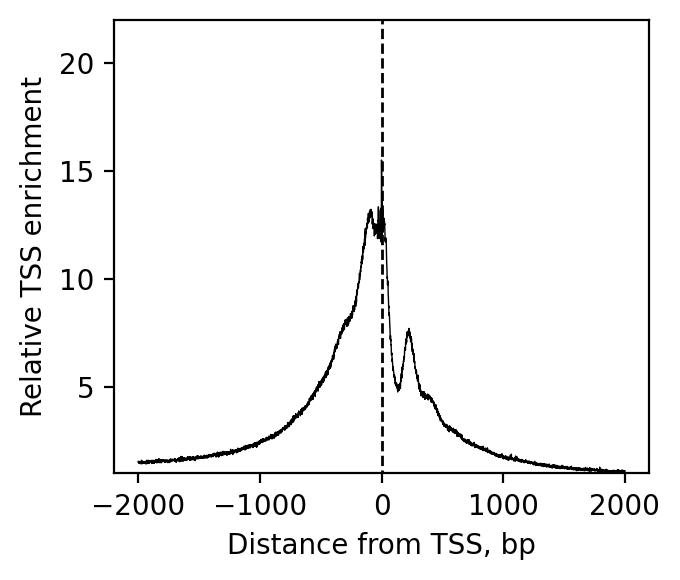

In [16]:
halfwinwidth = 2000
fig, ax = plt.subplots(figsize = (3.5,3), dpi = 200)
ax.plot(np.linspace(-2e3, 2e3, 4000), data.uns['TSS_profile'][:-1]/data.uns['TSS_profile'].min(), c = 'Black', linewidth = 0.5)
    
ax.set_xlabel('Distance from TSS, bp')
ax.set_ylabel('Relative TSS enrichment')
ax.vlines(0, 0, 22, color = 'black', linewidth = 1, linestyle = '--')
ax.set_ylim(1, 22)
plt.tight_layout()


## Load fragment matrix
Generated using snap.pp.make_fragment_file('final.bam', output_file = 'fragments.tsv', barcode_tag="CB", compression='gzip')  


data = snap.pp.import_data(
    'fragments.tsv',
    chrom_sizes=chrom_sizes,
    sorted_by_barcode=False, min_num_fragments=5,
    chunk_size=2000,
    file="atac.h5ad")

snap.metrics.tsse(data, gtf_file) <br />
snap.pp.filter_cells(data, min_counts=50, min_tsse=2, max_counts=100000) <br />
snap.pp.add_tile_matrix(data, bin_size=500, counting_strategy='insertion') <br />
snap.tl.macs3(data, groupby=None) <br />
ata.uns['macs3_pseudobulk'].to_csv('peak_output.bed', sep='\t', header=False, index=False) <br />
snap.metrics.frip(data, regions = {'peaks_frac':'peak_output.bed'}) <br />


In [5]:
data = sc.read_h5ad('data/ATACseq_run2/K562_L1210_fragment_matrix.h5ad')

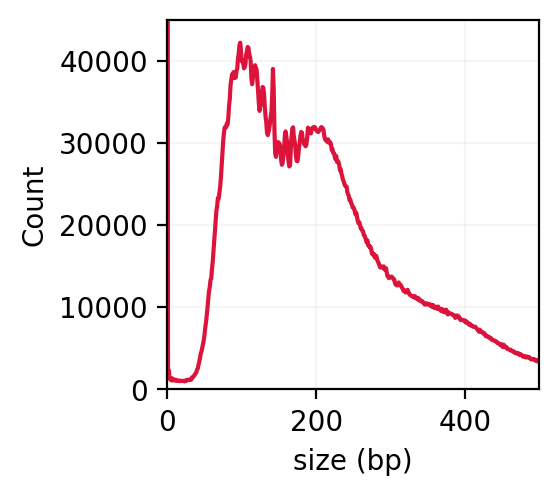

In [17]:
#Fragment size distribution
fig, ax = plt.subplots(figsize = (2.4,2.4), dpi = 200)
ax.plot([i for i in range(data.uns['frag_size_distr'].shape[0])], data.uns['frag_size_distr'], color = 'crimson')
ax.set_xlim(0, 500)
ax.set_ylim(0, 45e3)
ax.set_xlabel('size (bp)')
ax.set_ylabel('Count')
ax.grid(alpha = 0.1)

In [18]:
#Filtering for different populations
bg = data.obs['cell_type'] == 'background'
mm = data.obs['cell_type'] == 'mouse'
hs = data.obs['cell_type'] == 'human'
db = data.obs['cell_type'] == 'doublet'

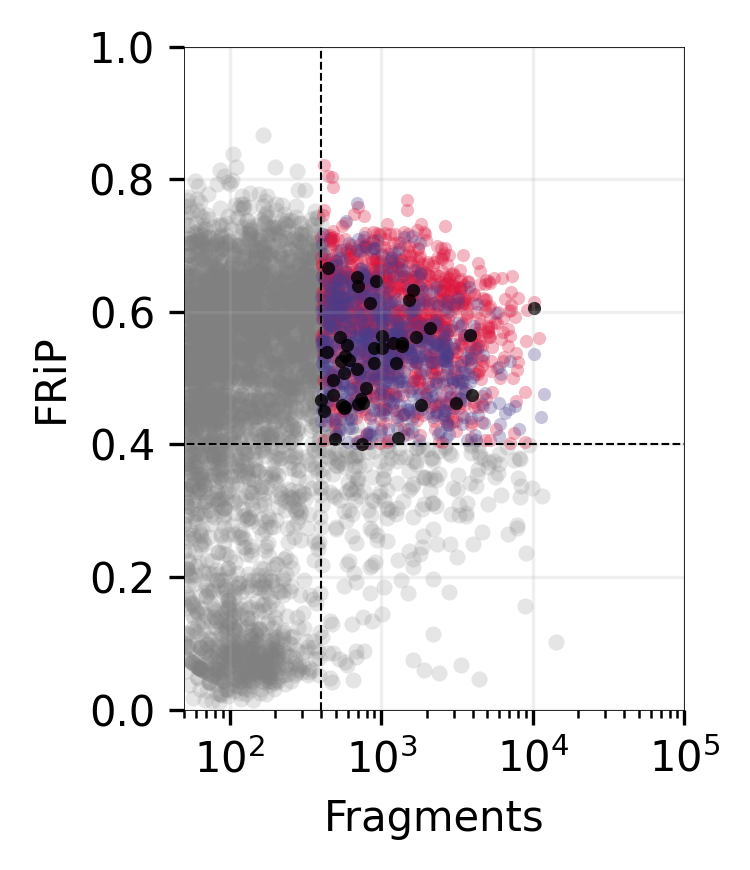

In [26]:
fig, ax = plt.subplots(figsize = (2.6,3), dpi =300)

x = data.obs['n_fragment']
y = data.obs['peaks_frac'].values

ax.scatter(x[bg], y[bg],s = 15, alpha = 0.2, c = 'grey', marker ='o', linewidth = 0, label = 'Background')
ax.scatter(x[mm], y[mm],s = 10, alpha = 0.3, c = 'crimson', marker ='o', linewidth = 0, label = 'mouse')
ax.scatter(x[hs], y[hs],s = 10, alpha = 0.3, c = 'darkslateblue', marker ='o', linewidth = 0, label = 'human')
ax.scatter(x[db], y[db],s = 10, alpha = 0.8, c = 'black', marker ='o', linewidth = 0, label = 'doublet')



ax.set_ylim(0, 1)
ax.set_xlim(50, 1e5)
ax.set_xscale('log')

ax.set_ylabel('FRiP')
ax.set_xlabel('Fragments')

ax.vlines(400, 0, ymax = 35, linestyle ='--', color = 'black', linewidth = 0.5)
ax.hlines(0.4, 1, 3e6, linestyle ='--', color = 'black', linewidth = 0.5)

ax.grid(True, alpha = 0.2)

plt.tight_layout()


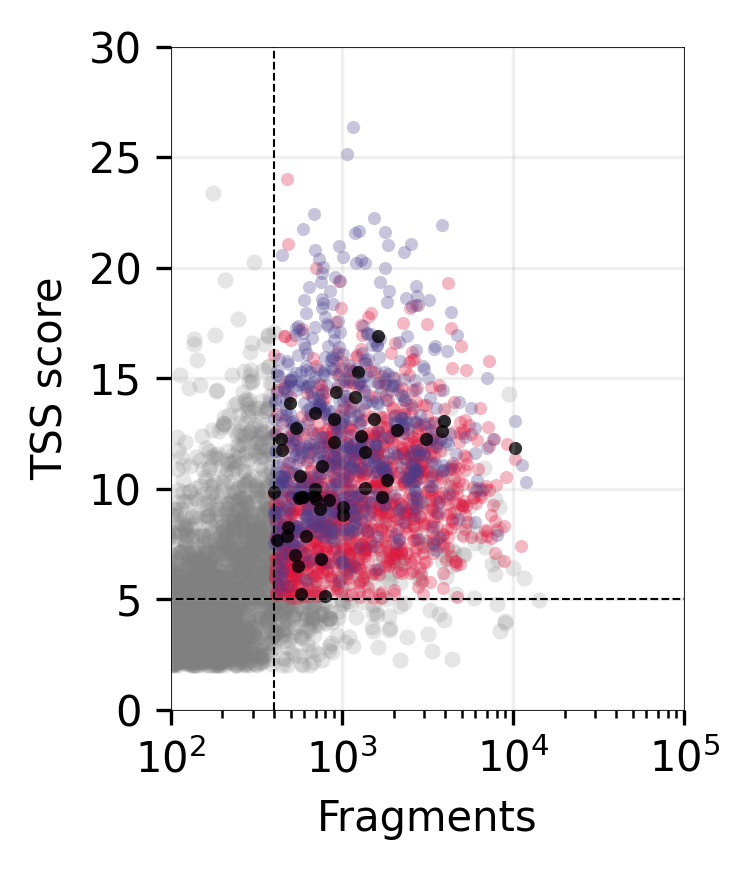

In [25]:
fig, ax = plt.subplots(figsize = (2.6,3), dpi =300)

ax.scatter(data.obs['n_fragment'][bg], data.obs['tsse'].values[bg],s = 15, alpha = 0.2, c = 'grey', marker ='o', linewidth = 0)
ax.scatter(data.obs['n_fragment'][mm], data.obs['tsse'].values[mm],s = 10, alpha = 0.3, c = 'crimson', marker ='o', linewidth = 0)
ax.scatter(data.obs['n_fragment'][hs], data.obs['tsse'].values[hs],s = 10, alpha = 0.3, c = 'darkslateblue', marker ='o', linewidth = 0)
ax.scatter(data.obs['n_fragment'][db], data.obs['tsse'].values[db],s = 10, alpha = 0.8, c = 'black', marker ='o', linewidth = 0)

ax.set_xscale('log')
ax.set_ylabel('TSS score')
ax.set_xlabel('Fragments')

ax.vlines(400, 0, ymax = 35, linestyle ='--', color = 'black', linewidth = 0.5)
ax.hlines(5, 1, 3e6, linestyle ='--', color = 'black', linewidth = 0.5)

ax.set_xlim(100, 1e5)
ax.set_ylim(0, 30)

ax.grid(True, alpha = 0.2)

plt.tight_layout()


Text(4000.0, 4000.0, '0.0248')

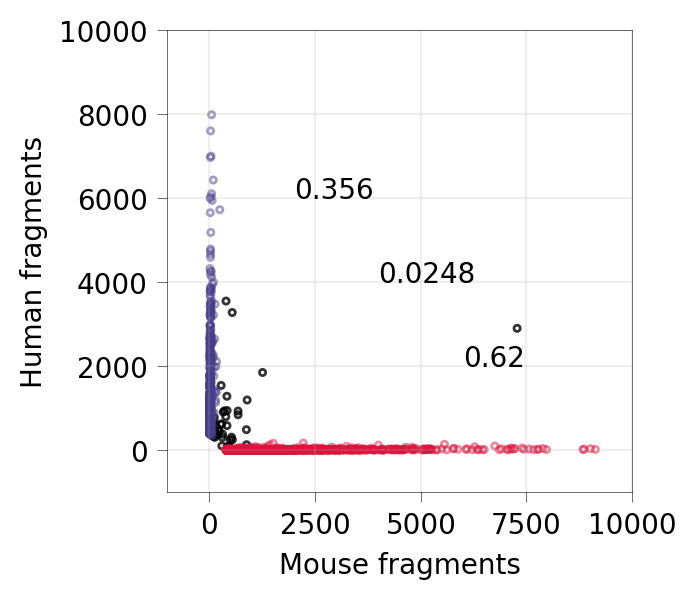

In [24]:
fig, ax = plt.subplots(figsize = (3,3), dpi = 200)


ax.scatter(data[db].obs['mm_fragments']/2, data[db].obs['hs_fragments']/2, s = 5, marker = 'o', facecolors = 'None', edgecolors='black', alpha = 0.8)
ax.scatter(data[mm].obs['mm_fragments']/2, data[mm].obs['hs_fragments']/2, s = 5, marker = 'o', facecolors = 'None', edgecolors='crimson', alpha = 0.5)
ax.scatter(data[hs].obs['mm_fragments']/2, data[hs].obs['hs_fragments']/2, s = 5, marker = 'o', facecolors = 'None', edgecolors='darkslateblue', alpha = 0.5)


ax.set_xlabel('Mouse fragments')
ax.set_ylabel('Human fragments')

ax.set_xlim(-1e3, 10e3)
ax.set_ylim(-1e3, 10e3)
plt.rcParams['axes.linewidth'] = 0.2
ax.yaxis.set_tick_params(width=0.2)
ax.xaxis.set_tick_params(width=0.2)
ax.grid(True, alpha = 0.2)

ax.text(6e3, 2e3, np.round((mm).sum()/(~(bg)).sum(), 3))
ax.text(2e3, 6e3, np.round((hs).sum()/(~(bg)).sum(), 3))
ax.text(4e3, 4e3, np.round((db).sum()/(~(bg)).sum(), 4))
